# KMT2D

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2023-10-09
Using gpsea version 0.1.1dev


In [2]:
KTM2D_transcript_id = 'NM_003482.4'
KTM2D_protein_id = "NP_003473.3"

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_creator = configure_caching_cohort_creator(hpo)

cohort_name = 'KMT2D'
phenopacket_store_release = '0.1.19'

registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))

cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
del phenopackets
validation.summarize()

Patients Created: 100%|██████████| 65/65 [02:01<00:00,  1.87s/it]
Validated under none policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewable
from IPython.display import HTML, display

viewer = CohortViewable(hpo)
display(HTML(viewer.process(cohort=cohort, transcript_id=KTM2D_transcript_id)))

HPO Term,ID,Seen in n individuals
Depressed nasal tip,HP:0000437,36
Prominent fingertip pads,HP:0001212,30
Global developmental delay,HP:0001263,30
Long palpebral fissure,HP:0000637,25
Macrotia,HP:0000400,24
Highly arched eyebrow,HP:0002553,22
Intellectual disability,HP:0001249,21
Eversion of lateral third of lower eyelids,HP:0007655,18
Cleft palate,HP:0000175,17
Hearing impairment,HP:0000365,16


In [5]:
from gpsea.preprocessing import configure_protein_metadata_service
from gpsea.preprocessing import VVMultiCoordinateService
from gpsea.model.genome import GRCh38

pms = configure_protein_metadata_service()
protein_meta = pms.annotate(KTM2D_protein_id)
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(KTM2D_transcript_id)


In [6]:
from gpsea.view import ProteinVisualizable, ProteinVisualizer, ProteinViewable

pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)

In [7]:
viewer = ProteinViewable()
html_prot = viewer.process(cohort, pvis)
display(HTML(html_prot))

Feature Name,Feature Type,Feature Coordinates,Variants in Feature
Disordered,region,1 - 60,2
Disordered,region,368 - 387,0
Disordered,region,393 - 416,0
Disordered,region,436 - 1331,3
15 X 5 AA repeats of S/P-P-P-E/P-E/A,region,439 - 668,0
1,repeat,442 - 446,0
2,repeat,460 - 464,0
3,repeat,469 - 473,0
4,repeat,496 - 500,0
5,repeat,504 - 508,0


<Axes: title={'center': 'Histone-lysine N-methyltransferase 2D\ntranscript: NM_003482.4, protein: NP_003473.3'}>

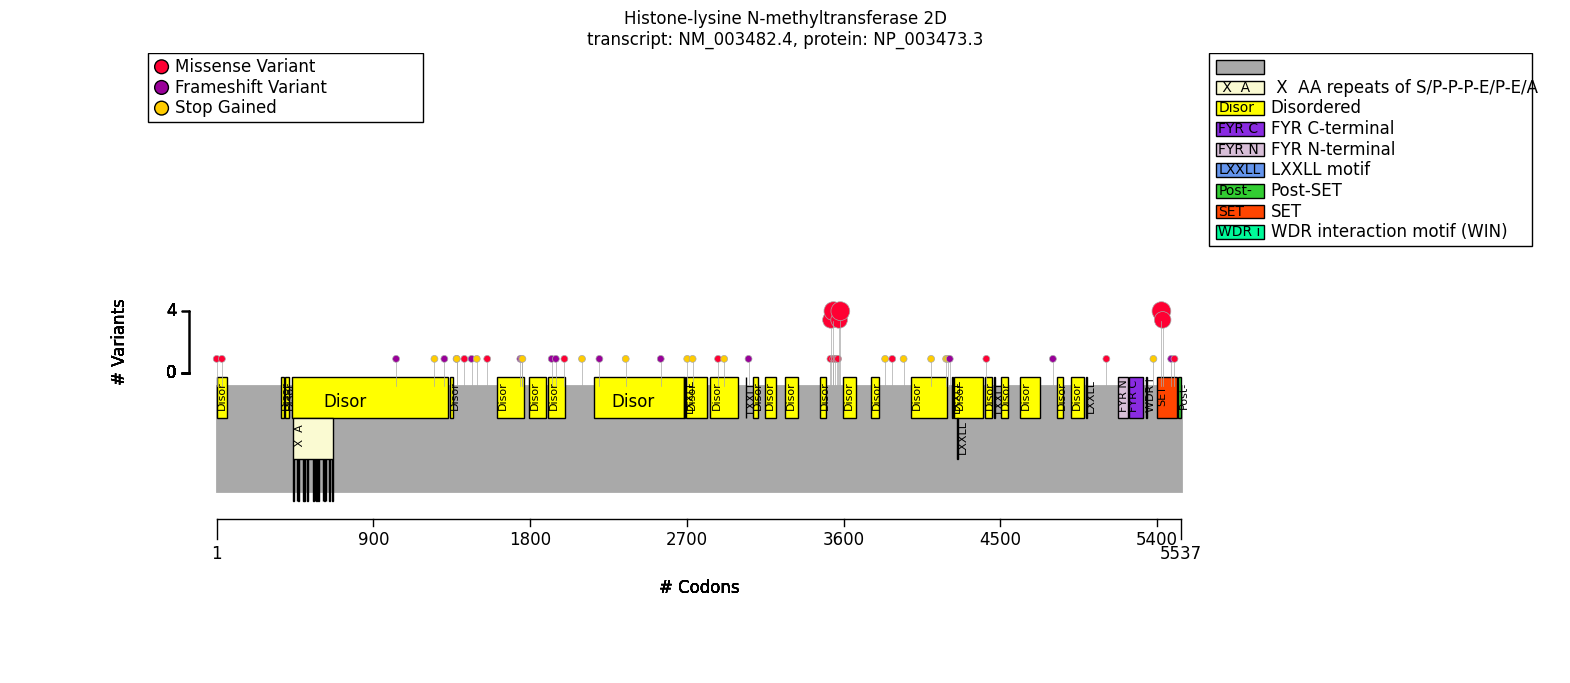

In [8]:
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

In [9]:
from gpsea.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from gpsea.analysis.predicate import PatientCategories
from gpsea.model.genome import Region

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = False
analysis_config.hpo_mtc_strategy()

analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

In [10]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate.genotype import VariantPredicates

is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=KTM2D_transcript_id)
missense = analysis.compare_hpo_vs_genotype(is_missense)
missense.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_003482.4                       Yes             No  \
                                                    Count Percent  Count   
Sensorineural hearing impairment [HP:0000407]        6/11     55%   0/13   
Hearing impairment [HP:0000365]                     14/19     74%   8/21   
Ventricular septal defect [HP:0001629]               0/15      0%   5/21   
High forehead [HP:0000348]                            5/6     83%    1/5   
Motor delay [HP:0001270]                              2/8     25%    2/2   
Hypotonia [HP:0001252]                                2/7     29%  10/14   
Decreased proportion of CD4-positive, alpha-bet...    6/8     75%    2/5   
Blue sclerae [HP:0000592]                             4/7     57%   3/10   
Highly arched eyebrow [HP:0002553]                    8/9     89%  14/21   
Atrial septal defect [HP:0001631]                     5/7     71%   6/13   
Eversion of lateral third of lower eyelids [HP:...    2/3     67%  16/18   
Sacral dimple [HP:0000960]                            0/2      0%   6/10   
Recurrent otitis media [HP:0000403]                  8/15     53%   6/17   
Decreased proportion of memory B cells [HP:0030...    6/8     75%    5/5   
Renal duplication [HP:0000075]                        0/5      0%    2/8   
Intellectual disability, mild [HP:0001256]           3/12     25%    1/2   
Long palpebral fissure [HP:0000637]                   8/8    100%  17/21   
Sparse lateral eyebrow [HP:0005338]                   6/7     86%    5/8   
Seizure [HP:0001250]                                  2/8     25%   2/17   
Congenital hip dislocation [HP:0001374]               1/7     14%   5/16   
Clinodactyly of the 5th finger [HP:0004209]           2/9     22%   4/11   
Proportionate short stature [HP:0003508]             7/11     64%    4/9   
Severe short stature [HP:0003510]                    7/12     58%   4/10   
Scoliosis [HP:0002650]                               6/19     32%   4/17   
Depressed nasal tip [HP:0000437]                    16/20     80%  20/27   
Thin upper lip vermilion [HP:0000219]                 3/4     75%    4/6   
Delayed speech and language development [HP:000...   8/10     80%    2/2   
Feeding difficulties [HP:0011968]                    5/14     36%   3/11   
High, narrow palate [HP:0002705]                      8/9     89%    6/6   
Joint hypermobility [HP:0001382]                      2/7     29%   3/12   
Long eyelashes [HP:0000527]                           0/1      0%    3/6   
Cleft palate [HP:0000175]                            9/10     90%    8/8   
Low posterior hairline [HP:0002162]                   0/1      0%    2/6   
Prominent fingertip pads [HP:0001212]               12/15     80%  18/23   
Ectopic kidney [HP:0000086]                           0/2      0%    2/9   
Decreased circulating IgA level [HP:0002720]          2/8     25%    2/5   
Wide nasal bridge [HP:0000431]                        3/3    100%  11/14   
Postnatal growth retardation [HP:0008897]             5/8     62%    4/5   
Micrognathia [HP:0000347]                             3/6     50%    4/9   
Microcephaly [HP:0000252]                             3/7     43%   4/11   
High palate [HP:0000218]                            10/11     91%    8/8   
Sparse eyebrow [HP:0045075]                           6/7     86%   8/11   
Recurrent infections [HP:0002719]                   15/21     71%  15/20   
Short stature [HP:0004322]                           9/13     69%  13/18   

MISSENSE_VARIANT on NM_003482.4                                       \
                                                   Percent   p value   
Sensorineural hearing impairment [HP:0000407]           0%  0.003432   
Hearing impairment [HP:0000365]                        38%  0.030871   
Ventricular septal defect [HP:0001629]                 24%  0.061943   
High forehead [HP:0000348]                             20%  0.080087   
Motor delay [HP:0001270]                              100%  0.133333   